In [3]:
!pip install pandas_datareader

   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/109.5 kB 435.7 kB/s eta 0:00:01
   -------------------------------------- 109.5/109.5 kB 910.3 kB/s eta 0:00:00


In [7]:
!pip install keras

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     --------------- ---------------------- 20.5/48.7 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 610.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ----- ---------------------------------- 0.1/1.1 MB 2.9 MB/s eta 0:00:01
   -------------- ------------------------- 0.4/1.1 MB 5.3 MB/s eta 0:00:01
   -------------------------- ------------- 0.8/1.1 MB 5.4 MB/s eta 0:00:01
   ----------------------------------- ---- 1.0/1.1 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 5.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.7 kB ? eta -:--:--
   ---------------------------------------  133.1/133.7 kB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 133.7/133.7 kB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/127.5 kB ? eta -:--:--
   --------------

In [11]:
!pip install tensorflow

   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/385.2 MB 3.4 MB/s eta 0:01:53
   ---------------------------------------- 0.2/385.2 MB 3.1 MB/s eta 0:02:03
   ---------------------------------------- 0.5/385.2 MB 3.5 MB/s eta 0:01:50
   ---------------------------------------- 0.6/385.2 MB 3.6 MB/s eta 0:01:48
   ---------------------------------------- 0.9/385.2 MB 4.0 MB/s eta 0:01:37
   ---------------------------------------- 1.2/385.2 MB 4.6 MB/s eta 0:01:23
   ---------------------------------------- 1.5/385.2 MB 4.7 MB/s eta 0:01:22
   ---------------------------------------- 1.8/385.2 MB 5.0 MB/s eta 0:01:18
   ---------------------------------------- 2.0/385.2 MB 5.0 MB/s eta 0:01:17
   ---------------------------------------- 2.4/385.2 MB 5.3 MB/s eta 0:01:13
   ---------------------------------------- 2.7/385.2 MB 5.3 MB/s eta 0:01:13
   ---------------------------------------- 3.0/385.2 MB 5.3 MB/s eta 0

In [125]:
!pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     - -------------------------------------- 0.1/3.0 MB 1.3 MB/s eta 0:00:03
     ---- ----------------------------------- 0.4/3.0 MB 3.2 MB/s eta 0:00:01
     -------- ------------------------------- 0.6/3.0 MB 3.8 MB/s eta 0:00:01
     -------- ------------------------------- 0.6/3.0 MB 3.8 MB/s eta 0:00:01
     ------------------ --------------------- 1.4/3.0 MB 5.5 MB/s eta 0:00:01
     ------------------------ --------------- 1.8/3.0 MB 6.0 MB/s eta 0:00:01
     --------------------------- ------------ 2.0/3.0 MB 5.9 MB/s eta 0:00:01
     --------------------------------- ------ 2.5/3.0 MB 6.3 MB/s eta 0:00:01
     ----------------------------------- ---- 2.6/3.0 MB 6.0 MB/s eta 0:00:01
     ---------------------------------------  2.9/3.0 MB 6.1 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 5.7 MB/s eta 0:00:00


In [3]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
plt.style.use('fivethirtyeight')

In [5]:
ticker = "AAPL" 
df = yf.download(ticker, start="2012-01-01", end="2022-01-01")


[*********************100%***********************]  1 of 1 completed


In [7]:

df.tail(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-31,178.089996,179.229996,177.259995,177.570007,174.900375,64062300


In [9]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402625,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469278,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607717,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739513,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719306,394024400


In [11]:
df.shape

(2517, 6)

In [13]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [15]:
df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=2517, freq=None)

In [17]:
df['Date'] = df.index
df.index = range(len(df))

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

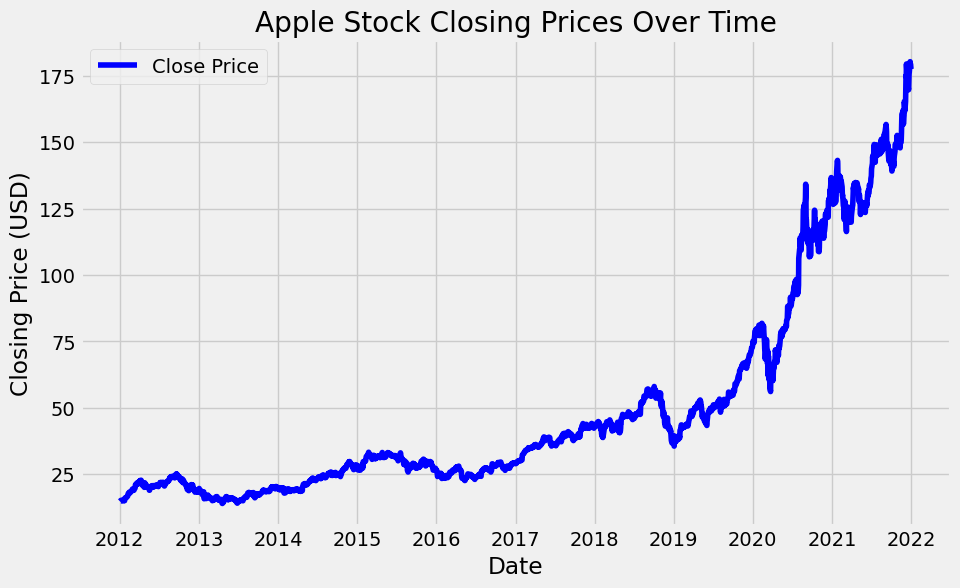

In [21]:
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Apple Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

In [23]:
df.set_index('Date', inplace=True)

In [25]:
#Creating a dataframe of only the closing price column
data = df.filter(['Close'])
#Turning it into a numpy array
dataset = data.values
#Determining the no.of rows to train the model on
train_data_len = math.ceil(len(dataset)*.8)
print(train_data_len)

2014


In [27]:
data.shape

(2517, 1)

In [29]:
#Scaling our data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00444329],
       [0.00491767],
       [0.00590292],
       ...,
       [0.99429028],
       [0.98719814],
       [0.98341175]])

In [31]:
# Create the scaled_data for the training set
train_data = scaled_data[0:train_data_len, :]

# Splitting the dataset into X_train and y_train
X_train = []
y_train = []

# Loop over the dataset to create the training data
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])  # Extract the previous 60 data points
    y_train.append(train_data[i, 0])       # Target is the current value at index i
    
    # Optional: Debugging print statement to verify
    if i <= 60:
        print(f"X_train: {X_train[-1]}")  # Print the latest sequence added to X_train
        print(f"y_train: {y_train[-1]}")  # Print the latest value added to y_train
        print()


X_train: [0.00444329 0.00491767 0.00590292 0.00684095 0.00669713 0.00702125
 0.00687314 0.00662415 0.006285   0.00733465 0.00828126 0.00798934
 0.00639018 0.00791635 0.00641379 0.0120484  0.01161266 0.01218148
 0.01341144 0.01415627 0.01409403 0.01386435 0.01484316 0.01576401
 0.01680723 0.01849225 0.02203185 0.02208551 0.02405602 0.02552852
 0.02299779 0.0239723  0.02395298 0.0266855  0.02629698 0.02701606
 0.02830826 0.02902735 0.03109874 0.03260773 0.03304348 0.03319588
 0.03061578 0.02999328 0.03008558 0.03251115 0.03319374 0.03465981
 0.0381157  0.04272642 0.04186352 0.04186566 0.04519921 0.04624242
 0.04549971 0.04482142 0.04411522 0.04646135 0.04807125 0.04874525]
y_train: 0.047079553022239484



In [33]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [35]:
X_train.shape

(1954, 60)

In [37]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1954, 60, 1)

In [39]:
#Building the actual model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))          

C:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [43]:
#Training the model
model.fit(X_train, y_train, batch_size = 32, epochs = 20)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0038
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 6.6829e-05
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 5.9303e-05
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 5.8398e-05
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 7.9893e-05
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 5.1080e-05
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 4.7561e-05
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 4.3459e-05
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 4.4493e-05
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 4.1848e-05
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 4.3094e-05
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 4.7626e-05
Epoch 13/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 4.5259e-05
Epoch 14/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 7.5293e-05
Epoch 15/20
62/62 ━

In [45]:
#Creating a test data set for model
test_data = scaled_data[train_data_len - 60: , :]
#Creating X_test and y_test
X_test = []
y_test = dataset[train_data_len: , :]
for i in range(train_data_len, len(scaled_data)):
    X_test.append(scaled_data[i-60:i, 0]) 

In [47]:
# Convert to numpy arrays
X_test = np.array(X_test)

In [49]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
X_test.shape

(503, 60, 1)

In [51]:
#Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


In [53]:
#Getting the root mean squared error
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

3.576591298191508

In [55]:
#Calculating % error
average_stock_price = df['Close'].mean()
average_stock_price 

49.04437750807631

In [57]:
percentage_error = (rmse / average_stock_price) * 100
percentage_error

7.292561308587388

C:\Users\User\AppData\Local\Temp\ipykernel_3788\1957151279.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


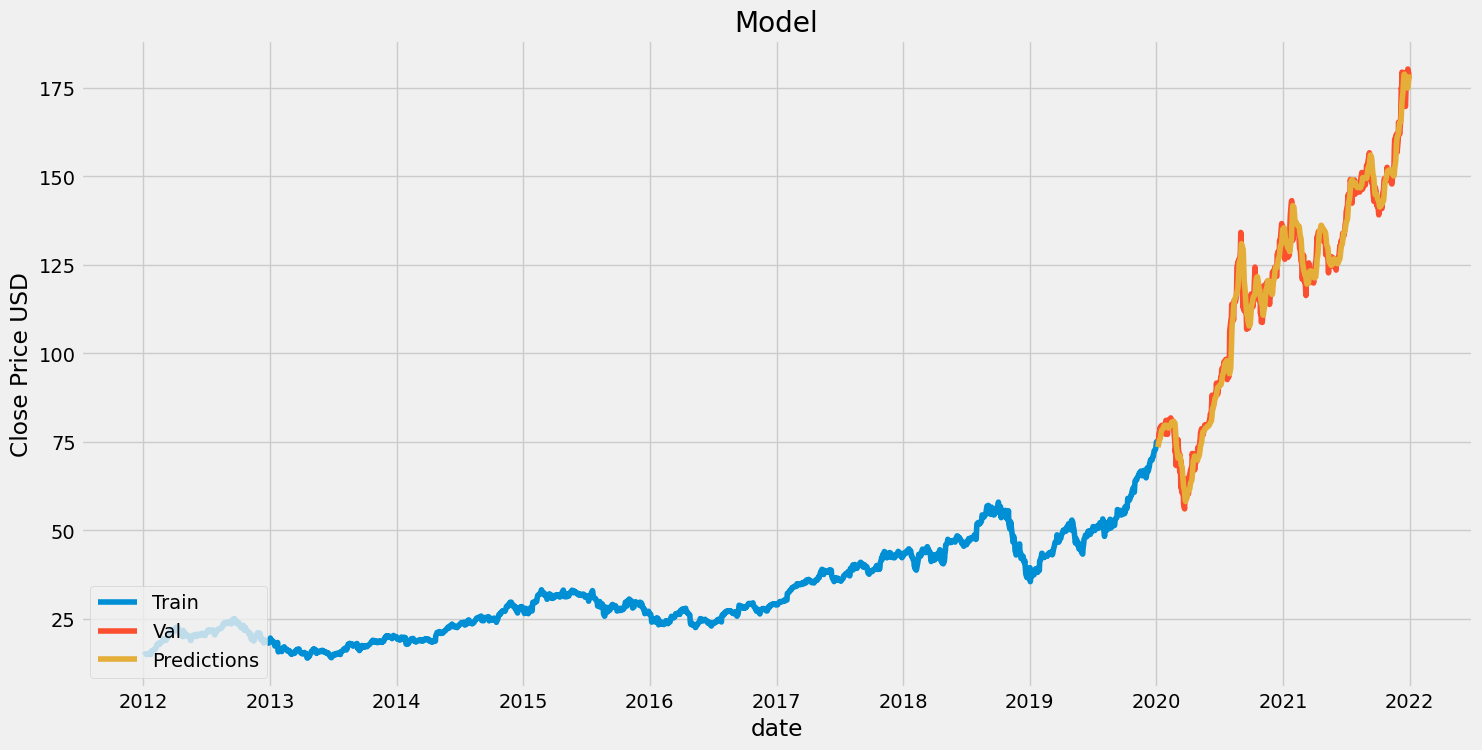

In [59]:
#Plotting the data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions
#Visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower left')
plt.show()

In [61]:
#Showing actual prices
valid

,Close,Predictions
Date,,
2020-01-06,74.949997,73.509521
2020-01-07,74.597504,74.045990
2020-01-08,75.797501,74.448746
2020-01-09,77.407501,74.870850
2020-01-10,77.582497,75.451561
...,...,...
2021-12-27,180.330002,174.994568
2021-12-28,179.289993,175.851868
2021-12-29,179.380005,176.926102


In [63]:
apple1 = yf.download(ticker, start="2012-01-01", end="2022-01-01")
#New df
new_df = apple1.filter(['Close'])
#Last 60 day closing price
l60 = new_df[-60:].values
#Scaling b/w 0 and 1
l60s = scaler.transform(l60)

X_test = []
#Append past 60 days
X_test.append(l60s)
#Convert to np array
X_test = np.array(X_test)
#Reshaping data
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
#Getting the predicted scaled price
pred_price = model.predict(X_test)
#Undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[179.27786]]


In [65]:
new_df.tail(1)

,Close
Date,
2021-12-31,177.570007


So our model performed really well in predicting the stock price even though it was off by 